In [1]:
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import numpy as np
from numpy import dot, cosh, tanh, log, exp

# Problem 1

## Part a

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


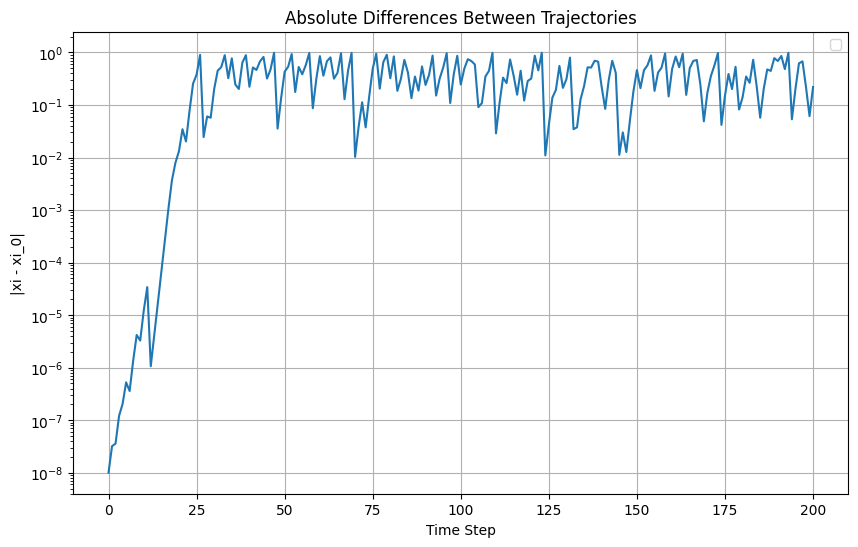

In [62]:
steps = 200
x_1 = np.zeros(steps+1)
x_1[0] = 0.1
x_2 = np.zeros(steps+1)
x_2[0] = 0.1 + 1e-8
for i in range(steps):
    x_1[i+1] = 4* x_1[i] * (1- x_1[i])
    x_2[i+1] = 4* x_2[i] * (1- x_2[i])
delta = np.abs(x_2 - x_1)

plt.figure(figsize=(10, 6))
plt.plot(np.arange(steps + 1), delta)
plt.yscale('log')
plt.xlabel('Time Step')
plt.ylabel('|xi - xi_0|')
plt.title('Absolute Differences Between Trajectories')
plt.legend()
plt.grid(True)
plt.show()

## Part b

In [63]:
rng = np.random.default_rng()
ensemble_size = 1_000_000
jump = 50
steps = 200
time_steps = int(np.ceil(steps/jump))
x = np.zeros((ensemble_size , steps +1))
x[:, 0] = 0.25 * rng.random(ensemble_size) 
ensemble = np.zeros((ensemble_size, time_steps +1))
ensemble[:, 0] = 1

for i in range(steps):
    x[:, i+1] = 4* x[:, i] * (1- x[:, i])

for j in range(ensemble_size):
    for i in range(1, time_steps +1):
        if 0 <= x[j, i * jump]  and x[j, i * jump] < 0.25:
            ensemble[j, i] = 1
        elif 0.25 <= x[j, i * jump]  and x[j, i * jump] < 0.5:
            ensemble[j, i] = 2
        elif 0.5 <= x[j, i * jump]  and x[j, i * jump] < 0.75:
            ensemble[j, i] = 3
        elif 0.75 <= x[j, i * jump]  and x[j, i * jump] < 1.:
            ensemble[j, i] = 4

ensemble = ensemble.astype(int)


In [64]:
indices_y3_1 = np.where(ensemble[:, 3] == 1)
ensemble_y3_1 = ensemble[indices_y3_1]
y3_1_size = ensemble_y3_1.shape[0]
p_y4_j = np.zeros(4)
p_kj = np.zeros((4,4))

for i in range(4):
    p_y4_j[i] = np.where(ensemble_y3_1[:, 4] == i+1)[0].size / y3_1_size

for k in range(4):
    indices_k = np.where(ensemble_y3_1[:, 2] == k+1)
    ensemble_k = ensemble_y3_1[indices_k]
    for j in range(4):
        p_kj[k,j] = np.where(ensemble_k[:, 4] == j+1)[0].size/ensemble_k.shape[0]

print(f"P(y4=1|y3 =1) = {np.round(p_y4_j[0],3)}\n P(y4=2|y3 =1, y2= k) = {np.round(p_kj[:,0], 3)} ")
print(f"\nP(y4=2|y3 =1) = {np.round(p_y4_j[1], 3)}\n P(y4=2|y3 =1, y2= k) = {np.round(p_kj[:,1], 3)} ")
print(f"\n P(y4=3|y3 =1) = {np.round(p_y4_j[2], 3)}\n P(y4=3|y3 =1, y2= k) = {np.round(p_kj[:,2], 3)} ")
print(f"\n P(y4=4|y3 =1) = {np.round(p_y4_j[3], 3)}\n P(y4=4|y3 =1, y2= k) = {np.round(p_kj[:,3], 3)} ")


P(y4=1|y3 =1) = 0.332
 P(y4=2|y3 =1, y2= k) = [0.333 0.331 0.335 0.331] 

P(y4=2|y3 =1) = 0.167
 P(y4=2|y3 =1, y2= k) = [0.168 0.166 0.169 0.167] 

 P(y4=3|y3 =1) = 0.166
 P(y4=3|y3 =1, y2= k) = [0.165 0.166 0.166 0.166] 

 P(y4=4|y3 =1) = 0.335
 P(y4=4|y3 =1, y2= k) = [0.334 0.336 0.331 0.336] 


## Part c

In [65]:
rng = np.random.default_rng()
ensemble_size = 1_000_000
jump = 1
steps = 4
time_steps = int(np.ceil(steps/jump))
x = np.zeros((ensemble_size , steps +1))
x[:, 0] = 0.25 * rng.random(ensemble_size) 
ensemble = np.zeros((ensemble_size, time_steps +1))
ensemble[:, 0] = 1

for i in range(steps):
    x[:, i+1] = 4* x[:, i] * (1- x[:, i])

for j in range(ensemble_size):
    for i in range(1, time_steps +1):
        if 0 <= x[j, i * jump]  and x[j, i * jump] < 0.25:
            ensemble[j, i] = 1
        elif 0.25 <= x[j, i * jump]  and x[j, i * jump] < 0.5:
            ensemble[j, i] = 2
        elif 0.5 <= x[j, i * jump]  and x[j, i * jump] < 0.75:
            ensemble[j, i] = 3
        elif 0.75 <= x[j, i * jump]  and x[j, i * jump] < 1.:
            ensemble[j, i] = 4

ensemble = ensemble.astype(int)

indices_y3_1 = np.where(ensemble[:, 3] == 1)
ensemble_y3_1 = ensemble[indices_y3_1]
y3_1_size = ensemble_y3_1.shape[0]
p_y4_j = np.zeros(4)
p_kj = np.zeros((4,4))

for i in range(4):
    p_y4_j[i] = np.where(ensemble_y3_1[:, 4] == i+1)[0].size / y3_1_size


indices_k_1 = np.where(ensemble_y3_1[:, 2] == 1)
ensemble_k_1 = ensemble_y3_1[indices_k_1]

indices_k_4 = np.where(ensemble_y3_1[:, 2] == 4)
ensemble_k_4 = ensemble_y3_1[indices_k_4]
for j in range(4):
    p_kj[0,j] = np.where(ensemble_k_1[:, 4] == j+1)[0].size/ensemble_k_1.shape[0]
    p_kj[3,j] = np.where(ensemble_k_4[:, 4] == j+1)[0].size/ensemble_k_4.shape[0]

print(f"P(y4=1|y3 =1, y2= 1) = {np.round(p_kj[0,0], 3)} not equal P(y4=1|y3 =1, y2= 4) = {np.round(p_kj[0,3], 3)}\n")
print(f"P(y4=2|y3 =1, y2= 1) = {np.round(p_kj[1,0], 3)} equal P(y4=2|y3 =1, y2= 4) = {np.round(p_kj[1,3], 3)}\n")
print(f"P(y4=3|y3 =1, y2= 1) = {np.round(p_kj[2,0], 3)}  equal P(y4=3|y3 =1, y2= 4) = {np.round(p_kj[2,3], 3)}\n")
print(f"P(y4=4|y3 =1, y2= 1) = {np.round(p_kj[3,0], 3)} not equal P(y4=4|y3 =1, y2= 4) = {np.round(p_kj[3,3], 3)}")


P(y4=1|y3 =1, y2= 1) = 0.252 not equal P(y4=1|y3 =1, y2= 4) = 0.0

P(y4=2|y3 =1, y2= 1) = 0.0 equal P(y4=2|y3 =1, y2= 4) = 0.0

P(y4=3|y3 =1, y2= 1) = 0.0  equal P(y4=3|y3 =1, y2= 4) = 0.0

P(y4=4|y3 =1, y2= 1) = 0.502 not equal P(y4=4|y3 =1, y2= 4) = 0.0


## Part d

In [71]:
rng = np.random.default_rng()
ensemble_size = 1_000_000
jump = 50
steps = 200
time_steps = int(np.ceil(steps/jump))
x = np.zeros((ensemble_size , steps +1))
x[:, 0] = 0.25 * rng.random(ensemble_size) 
ensemble = np.zeros((ensemble_size, time_steps +1))
ensemble[:, 0] = 1

for i in range(steps):
    x[:, i+1] = 4* x[:, i] * (1- x[:, i])

for j in range(ensemble_size):
    for i in range(1, time_steps +1):
        if 0 <= x[j, i * jump]  and x[j, i * jump] < 0.25:
            ensemble[j, i] = 1
        elif 0.25 <= x[j, i * jump]  and x[j, i * jump] < 0.5:
            ensemble[j, i] = 2
        elif 0.5 <= x[j, i * jump]  and x[j, i * jump] < 0.75:
            ensemble[j, i] = 3
        elif 0.75 <= x[j, i * jump]  and x[j, i * jump] < 1.:
            ensemble[j, i] = 4

ensemble = ensemble.astype(int)

In [88]:
w_ij = np.zeros((4, 4,4))

indices_y0_j = np.where(ensemble[:, 0] == 1)
ensemble_y0_j = ensemble[indices_y0_j]
for i in range(4):
    w_ij[0, i,0] = np.where(ensemble_y0_j[:, 1] == i+1)[0].size / ensemble_y0_j.shape[0]

for j in range(4):
    indices_y1_j = np.where(ensemble[:, 1] == j+1)
    ensemble_y1_j = ensemble[indices_y1_j]
    for i in range(4):
        w_ij[1, i,j] = np.where(ensemble_y1_j[:, 2] == i+1)[0].size / ensemble_y1_j.shape[0]

for j in range(4):
    indices_y2_j = np.where(ensemble[:, 2] == j+1)
    ensemble_y2_j = ensemble[indices_y2_j]
    for i in range(4):
        w_ij[2, i,j] = np.where(ensemble_y2_j[:, 3] == i+1)[0].size / ensemble_y2_j.shape[0]

for j in range(4):
    indices_y3_j = np.where(ensemble[:, 3] == j+1)
    ensemble_y3_j = ensemble[indices_y3_j]
    for i in range(4):
        w_ij[3, i,j] = np.where(ensemble_y3_j[:, 4] == i+1)[0].size / ensemble_y3_j.shape[0]

print(f"W(t0) = \n{np.round(w_ij[0],2)}\n\n W(t1) = \n{np.round(w_ij[1],2)}\n\n W(t2) = \n{np.round(w_ij[2],2)}\n\n W(t3) = \n{np.round(w_ij[3],2)}\n")
print("So we can see that ")

W(t0) = 
[[0.33 0.   0.   0.  ]
 [0.17 0.   0.   0.  ]
 [0.17 0.   0.   0.  ]
 [0.33 0.   0.   0.  ]]

 W(t1) = 
[[0.33 0.33 0.33 0.33]
 [0.17 0.17 0.17 0.17]
 [0.17 0.17 0.17 0.17]
 [0.33 0.33 0.33 0.33]]

 W(t2) = 
[[0.33 0.33 0.33 0.33]
 [0.17 0.17 0.17 0.17]
 [0.17 0.17 0.17 0.17]
 [0.33 0.33 0.33 0.33]]

 W(t3) = 
[[0.33 0.33 0.33 0.33]
 [0.17 0.17 0.17 0.17]
 [0.17 0.17 0.17 0.17]
 [0.33 0.33 0.34 0.33]]

So we can see that 


We can see that $W(t_1) \approx W(t_2) \approx W(t_3)$

## part e

In [92]:
p0 = np.array([1,0,0,0])
p_t4_master = w_ij[3] @ w_ij[2] @ w_ij[1] @ w_ij[0] @ p0
p_t4 = np.zeros(4)

for i in range(4):
    p_t4[i] = np.where(ensemble[:, 4] == i+1)[0].size / ensemble_size 

print(f"From master equation the p(t4) = {np.round(p_t4_master,4)},\n and by dividing the trajectories p(t4) = {np.round(p_t4, 4)}")

From master equation the p(t4) = [0.3331 0.1666 0.167  0.3333],
 and by dividing the trajectories p(t4) = [0.3331 0.1666 0.167  0.3333]


As we can see the final probability vector $P(t_4)$ is the same from master equation and by dividing the trajectoris!

## Part f

In [101]:
p_t

array([[1.      , 0.      , 0.      , 0.      ],
       [0.333419, 0.166243, 0.167282, 0.333056],
       [0.333828, 0.166175, 0.166756, 0.333241],
       [0.33339 , 0.167086, 0.166342, 0.333182],
       [0.333127, 0.166571, 0.167045, 0.333257]])

P(t_0) = [1. 0. 0. 0.]
 P(t_1) = [0.333419 0.166243 0.167282 0.333056]
P(t_2) = [0.333828 0.166175 0.166756 0.333241]
 P(t_3) = [0.333127 0.166571 0.167045 0.333257]
P(t_4) = [0.333127 0.166571 0.167045 0.333257]


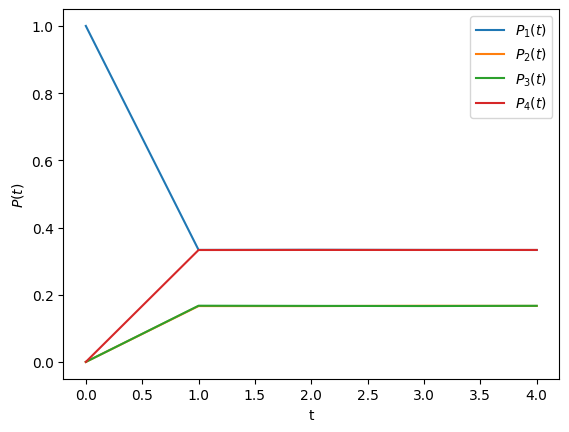

In [102]:
p_t = np.zeros((5, 4))
p_t[0] = p0
p_t[1] = w_ij[0] @ p_t[0]
p_t[2] = w_ij[1] @ p_t[1]
p_t[3] = w_ij[2] @ p_t[2]
p_t[4] = w_ij[3] @ p_t[3]

print(f"P(t_0) = {p_t[0]}\n P(t_1) = {p_t[1]}")
print(f"P(t_2) = {p_t[2]}\n P(t_3) = {p_t[4]}")
print(f"P(t_4) = {p_t[4]}")

plt.plot(np.arange(5), p_t[:,0], label="$P_1 (t)$")
plt.plot(np.arange(5), p_t[:,1], label="$P_2 (t)$")
plt.plot(np.arange(5), p_t[:,2], label="$P_3 (t)$")
plt.plot(np.arange(5), p_t[:,3], label="$P_4 (t)$")
plt.xlabel("t")
plt.ylabel("$P(t)$")
plt.legend()

As we can see, after the first step all the probabilities approach to the constant values, which for $P_1$ and $P_4$ is 0.333, and for $P_2$ and $P_3$ is 0.167!

# Problem 2- Part a

In [85]:
df = pd.read_csv('mldata.csv')

print(df.head()) 
df_array = df.values
df_array[:, 2] = df.iloc[:, 2]

   1.8985625210050046  4.1361552124536445  1
0            2.019088           -1.646162  1
1           -1.343676           -2.010283  2
2           -2.728415           -4.055331  2
3           -2.361083           -3.432763  2
4            2.113689           -1.907397  1


In [53]:
def sigma(y):
    return 0.5 * (1 + tanh(y))

def lost_func(omega, data, s=1):
    df_size = data.shape[0]
    p_dw = np.zeros(df_size)
    for i in range(df_size):
        x = data[i, :3] 
        if data[i, 2] == 1.:
            p_dw[i] = sigma(x @ omega)
        else:
            p_dw[i] = 1 - sigma(x @ omega - omega[2])
    
    return -np.sum(log(p_dw)) + dot(omega, omega) / (2 * s * s)

In [54]:
initial_omega = np.array([1, 1, 1])
result = minimize(lambda omega: lost_func(omega, df_array), initial_omega)

# Extract the optimal value of omega
optimal_omega = result.x
print(f"Best fit for omega* = {optimal_omega} and the lost function(omega*) = {lost_func(optimal_omega, df_array)}")

Best fit for omega* = [0.99637373 1.14135039 2.04369452] and the lost function(omega*) = 8.13890139119979


In [55]:
def grad_func(omega, p_dw, s=1):
    df_size = p_dw.shape[0]
    s2 = s * s
    sequence = np.zeros(df_size)
    for i in range(df_size):
        x = p_dw[i, :3] 
        if p_dw[i, 2] == 1.:
            if sigma(x @ omega) == 0:
                continue
            sequence[i] = -1 / sigma(x @ omega) / cosh(x @ omega)**2 / 2
        elif p_dw[i, 2] == 2.:
            if sigma(x @ omega - omega[2]) == 1:
                continue
            sequence[i] = 1 / (1 - sigma(x @ omega - omega[2])) / cosh(x @ omega - omega[2])**2 / 2 
    
    return np.array([np.sum(sequence) * x[0] + omega[0] / s2, 
                     np.sum(sequence)* x[1] + omega[1] / s2,
                     np.sum(sequence) + omega[2] / s2])

def gradient_descent(initial_params, learning_rate, max_iter, tol, p_dw, s=1):
    params = initial_params.copy()
    for _ in range(max_iter):
        gradient = grad_func(params, p_dw, s)
        params -= learning_rate * gradient
        if np.linalg.norm(gradient) < tol:
            break
    return params

# Example usage
initial_params = np.array([1, 1., 2])
learning_rate = 0.00001
max_iter = 10_000
tol = 1e-6

omega_star = gradient_descent(initial_params, learning_rate, max_iter, tol, df_array, s=1)
print(f"Best fit for omega* = {np.round(omega_star, 6)} and the lost function(omega*) = {np.round(lost_func(omega_star, df_array), 6)}")


Best fit for omega* = [1.098806 1.069351 1.962095] and the lost function(omega*) = 9.069463


# Part C

In [56]:
x_A = np.array([-1, -4, 1])
x_B = np.array([-1, -1, 1])
x_C = np.array([-1, 3, 1])
print(f"The prob. of A to be in state one = {np.round(sigma(x_A @ omega_star), 4)}\n", 
    f"The prob. of B to be in state one = {np.round(sigma(x_B @ omega_star), 4)}\n",
    f"The prob. of C to be in state one = {np.round(sigma(x_C @ omega_star), 4)}")

The prob. of A to be in state one = 0.0011
 The prob. of B to be in state one = 0.3984
 The prob. of C to be in state one = 0.9997


# Part D

In [57]:
s = 0.1
initial_params = np.array([1, 1., 2])
learning_rate = 0.00001
max_iter = 10_000
tol = 1e-6

omega_star = gradient_descent(initial_params, learning_rate, max_iter, tol, df_array, s)
print(f"Best fit for omega* = {np.round(omega_star, 6)} and the lost function(omega*) = {np.round(lost_func(omega_star, df_array), 6)}")
x_A = np.array([-1, -4, 1])
x_B = np.array([-1, -1, 1])
x_C = np.array([-1, 3, 1])
print(f"The prob. of A to be in state one = {np.round(sigma(x_A @ omega_star), 4)}\n", 
      f"The prob. of B to be in state one = {np.round(sigma(x_B @ omega_star), 4)}\n",
      f"The prob. of C to be in state one = {np.round(sigma(x_C @ omega_star), 4)}")

Best fit for omega* = [0.247731 0.21012  0.194723] and the lost function(omega*) = 28.336434
The prob. of A to be in state one = 0.1434
 The prob. of B to be in state one = 0.3714
 The prob. of C to be in state one = 0.7604


In [58]:
s = 10.0
initial_params = np.array([1, 1., 2])
learning_rate = 0.00001
max_iter = 10_000
tol = 1e-6

omega_star = gradient_descent(initial_params, learning_rate, max_iter, tol, df_array, s)
print(f"Best fit for omega* = {np.round(omega_star, 6)} and the lost function(omega*) = {np.round(lost_func(omega_star, df_array), 6)}")
x_A = np.array([-1, -4, 1])
x_B = np.array([-1, -1, 1])
x_C = np.array([-1, 3, 1])
print(f"The prob. of A to be in state one = {np.round(sigma(x_A @ omega_star), 4)}\n", 
    f"The prob. of B to be in state one = {np.round(sigma(x_B @ omega_star), 4)}\n",
    f"The prob. of C to be in state one = {np.round(sigma(x_C @ omega_star), 4)}")

Best fit for omega* = [1.197109 1.167025 2.153675] and the lost function(omega*) = 9.164657
The prob. of A to be in state one = 0.0006
 The prob. of B to be in state one = 0.3963
 The prob. of C to be in state one = 0.9999


# HW 3 

## Part a

In [78]:
rng = np.random.default_rng()
size_ensemble = 100_000
omega_arr = np.zeros((size_ensemble, 3))
omega_arr[0] = np.array([1, 1, 1])

for i in range(1, size_ensemble):
    rand = 0.05 * (rng.random(3) - 0.5)
    rho = exp(-(lost_func(omega_arr[i-1] + rand, df_array)
                - lost_func(omega_arr[i-1], df_array)))
    if rho >= 1:
        omega_arr[i] = omega_arr[i-1] + rand
    else:
        r = rng.random()
        if r < rho:
            omega_arr[i] = omega_arr[i-1] + rand
        else:
            omega_arr[i] = omega_arr[i-1]

In [80]:
average_omega = np.mean(omega_arr, axis =0)
print(f"The average omega is {average_omega}\n", 
      'the ratio of omega_mean / omega_star = {}'.format(np.round(average_omega/ omega_star, 5)))

The average omega is [1.00742273 1.15062882 2.03558615]
 the ratio of omega_mean / omega_star = [0.84155 0.98595 0.94517]


## Par D

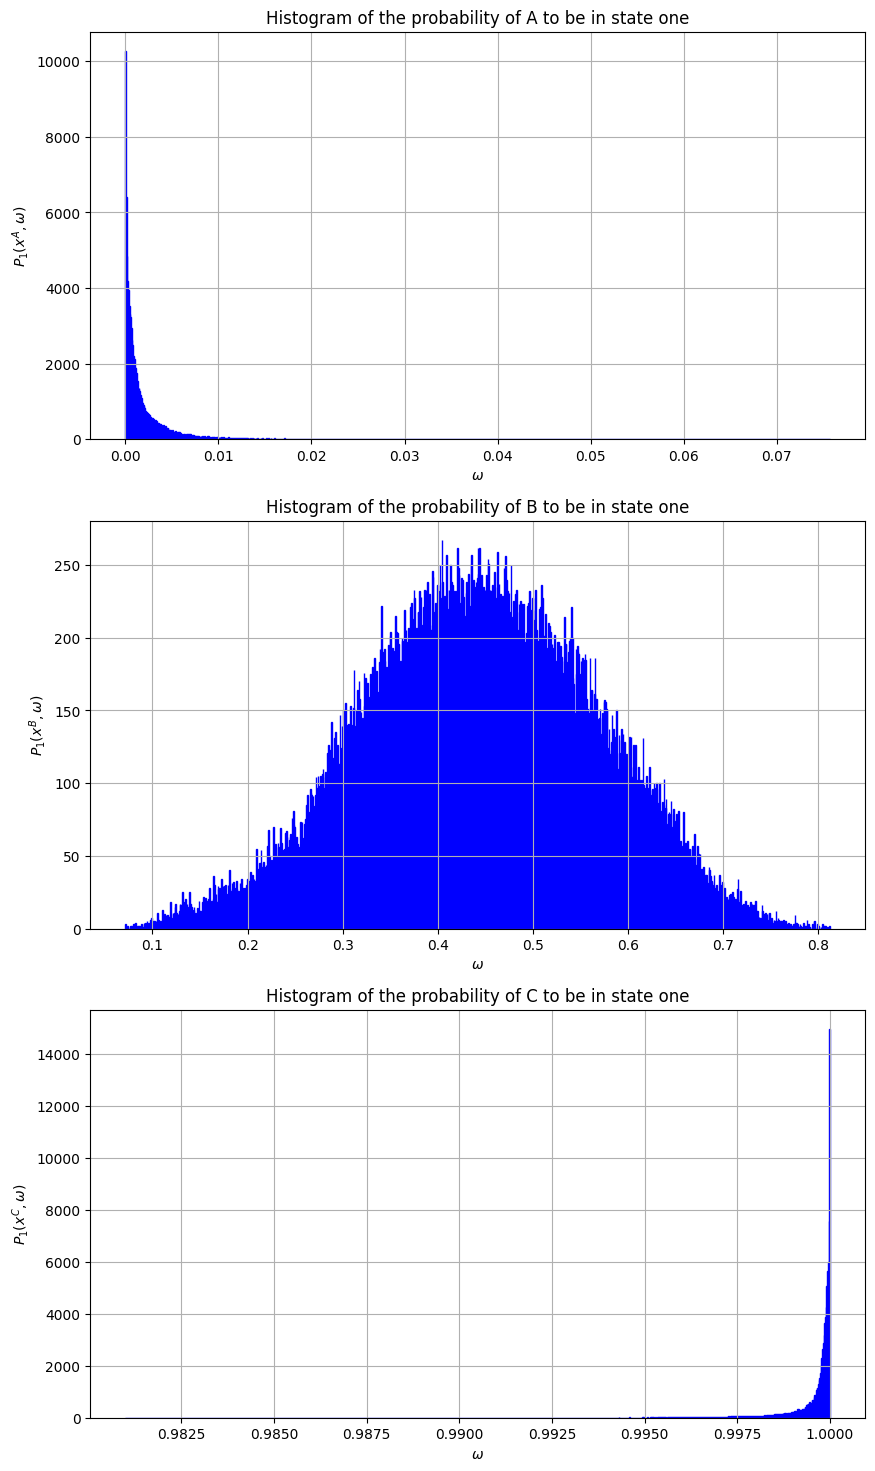

In [99]:
x_B = np.array([-1, -1])
arg_B = x_B[0] * omega_arr[:, 0] + x_B[1] * omega_arr[:, 1] + omega_arr[:, 2] 
p_1_B = sigma(arg_B)

x_A = np.array([-1, -4])
arg_A = x_A[0] * omega_arr[:, 0] + x_A[1] * omega_arr[:, 1] + omega_arr[:, 2] 
p_1_A = sigma(arg_A)

x_C = np.array([-1, 3])
arg_C = x_C[0] * omega_arr[:, 0] + x_C[1] * omega_arr[:, 1] + omega_arr[:, 2] 
p_1_C = sigma(arg_C)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 18))

ax1.hist(p_1_A, bins=1000, edgecolor='blue')  
ax1.set_title('Histogram of the probability of A to be in state one')
ax1.set_xlabel('$\omega$')
ax1.set_ylabel('$P_1(x^A , \omega)$')
ax1.grid(True)

ax2.hist(p_1_B, bins=1000, edgecolor='blue')  
ax2.set_title('Histogram of the probability of B to be in state one')
ax2.set_xlabel('$\omega$')
ax2.set_ylabel('$P_1(x^B , \omega)$')
ax2.grid(True)


ax3.hist(p_1_C, bins=1000, edgecolor='blue')  
ax3.set_title('Histogram of the probability of C to be in state one')
ax3.set_xlabel('$\omega$')
ax3.set_ylabel('$P_1(x^C , \omega)$')
ax3.grid(True)

